# Credpay Finances Business solutions

## 1.0 Libraries and Functions

### 1.1 Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### 1.2 Functions

In [3]:
def jupyter_settings():
    pass

## 2.0 Data Extraction

In [13]:
# Using kaggle API for download dataset
!kaggle datasets download -d laotse/credit-risk-dataset
# Extracting file from zip
!unzip credit-risk-dataset.zip 
# creating folder dataset and copy to folder the csv file
!mkdir dataset & !cp credit_risk_dataset.csv dataset/

100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 2.06MB/s]
100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 2.04MB/s]


In [26]:
base_credit = pd.read_csv('dataset/credit_risk_dataset.csv')

## 3.0 Descriptive Analysis

In [30]:
# Dimension
base_credit.shape

(32581, 12)

### 3.1 NaN

In [28]:
base_credit.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

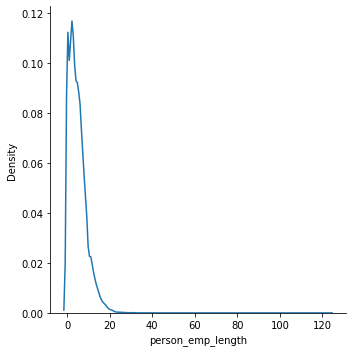

In [41]:
sns.displot(base_credit['person_emp_length'], kind='kde');

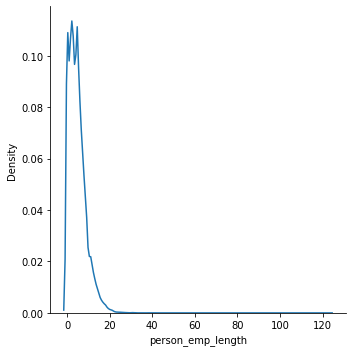

In [45]:
base_credit['person_emp_length'] = base_credit['person_emp_length'].fillna(
                                    base_credit['person_emp_length'].mean())
sns.displot(base_credit['person_emp_length'], kind='kde');

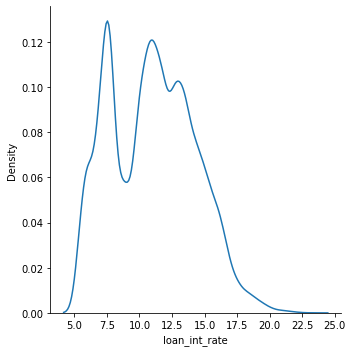

In [35]:
# Visualizing distribution and see if it will better replace per mean or median or zero
sns.displot(base_credit['loan_int_rate'], kind='kde');

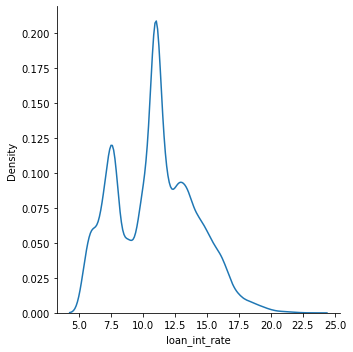

In [46]:
base_credit['loan_int_rate'] = base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean())
sns.displot(base_credit['loan_int_rate'], kind='kde');

In [47]:
base_credit.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 3.2 DataType

In [67]:
base_credit[base_credit['person_income'] >= base_credit['person_income'].max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [48]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [55]:
base_credit.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [53]:
base_credit['person_income'] = base_credit['person_income'].astype('float64').copy()
base_credit['loan_amnt'] = base_credit['loan_amnt'].astype('float64').copy()

0    59000.0
1     9600.0
2     9600.0
3    65500.0
4    54400.0
Name: person_income, dtype: float64

In [54]:
base_credit['person_emp_length'].value_counts()

0.000000      4105
2.000000      3849
3.000000      3456
5.000000      2946
1.000000      2915
4.000000      2874
6.000000      2666
7.000000      2196
8.000000      1687
9.000000      1367
4.789686       895
11.000000      740
10.000000      696
12.000000      575
13.000000      426
14.000000      335
15.000000      238
16.000000      165
17.000000      129
18.000000      104
19.000000       64
20.000000       42
21.000000       38
22.000000       19
24.000000       10
23.000000       10
25.000000        8
26.000000        6
27.000000        5
31.000000        4
28.000000        3
123.000000       2
30.000000        2
34.000000        1
29.000000        1
41.000000        1
38.000000        1
Name: person_emp_length, dtype: int64

In [50]:
base_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.000000,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.000000,79200.00,6000000.00
person_emp_length,32581.0,4.789686,4.085333,0.00,2.00,4.000000,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.000000,12200.00,35000.00
loan_int_rate,32581.0,11.011695,3.081605,5.42,8.49,11.011695,13.11,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.000000,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.150000,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.000000,8.00,30.00


### 3.3 Describing

In [ ]:
base_cre

## 4.0 Exploratory Data Analysis

## 5.0 Models

## 6.0 Business Performance

## 7.0 Production

## 8.0 Deployment